# Importando bibliotecas

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Aquisição dos dados

In [120]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

In [121]:
projects = pd.read_csv(url)

projects.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [122]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   unfinished      2157 non-null   int64
 1   expected_hours  2157 non-null   int64
 2   price           2157 non-null   int64
dtypes: int64(3)
memory usage: 50.7 KB


## Breve explicação do dataset

O conjunto de dados acima possui dados referentes a finalização de projetos, horas esperadas para finalização e o preço do mesmo.

# Análise exploratória

Para facilitar o entendimento, trocarei `unfinished` por `finished` e irei inverter os valores presentes na coluna.

In [123]:
projects.rename(columns={'unfinished': 'finished'}, inplace=True)
projects['finished'] = projects['finished'].map({
    1: 0,
    0: 1
})

projects.head(10)

,finished,expected_hours,price
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170
5,0,33,173
6,0,64,1965
7,0,99,1993
8,0,45,278
9,1,96,12479


In [124]:
sns.set_theme()

### Relação entre horas e a finalização

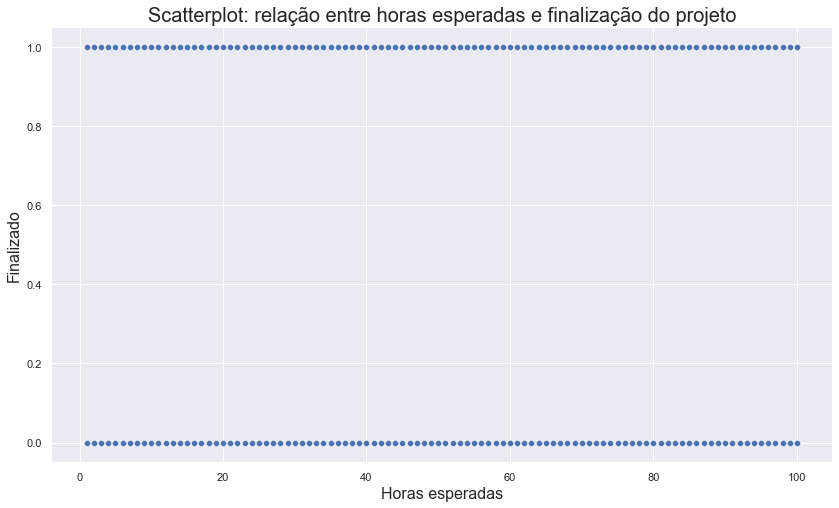

In [125]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=projects, x='expected_hours', y='finished')

plt.title('Scatterplot: relação entre horas esperadas e finalização do projeto', fontsize=20)
plt.ylabel('Finalizado', fontsize=16)
plt.xlabel('Horas esperadas', fontsize=16)

plt.show()

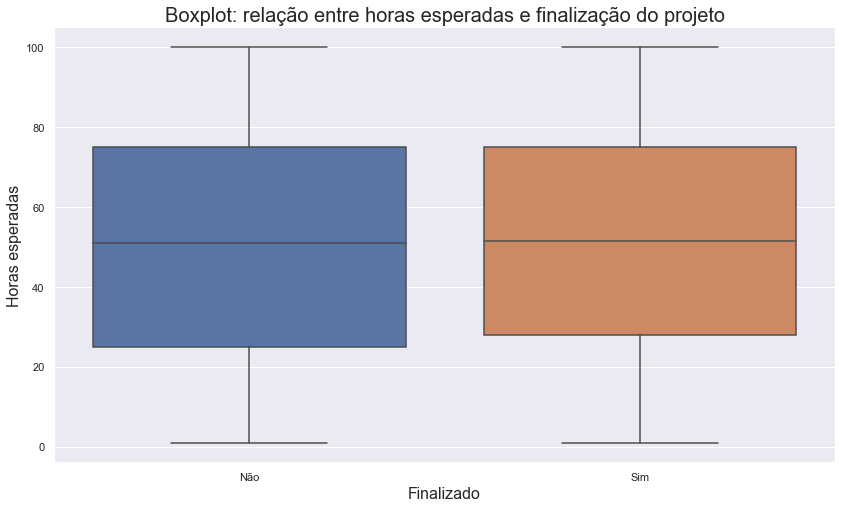

In [126]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=projects,  x='finished', y='expected_hours')

plt.title('Boxplot: relação entre horas esperadas e finalização do projeto', fontsize=20)
plt.ylabel('Horas esperadas', fontsize=16)
plt.xlabel('Finalizado', fontsize=16)
plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

### Relação entre preço e finalização

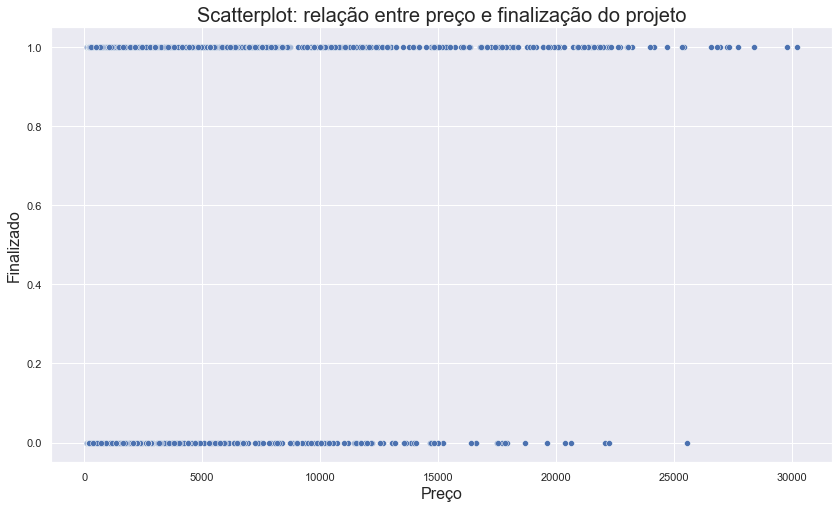

In [127]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=projects, x='price', y='finished')

plt.title('Scatterplot: relação entre preço e finalização do projeto', fontsize=20)
plt.ylabel('Finalizado', fontsize=16)
plt.xlabel('Preço', fontsize=16)

plt.show()

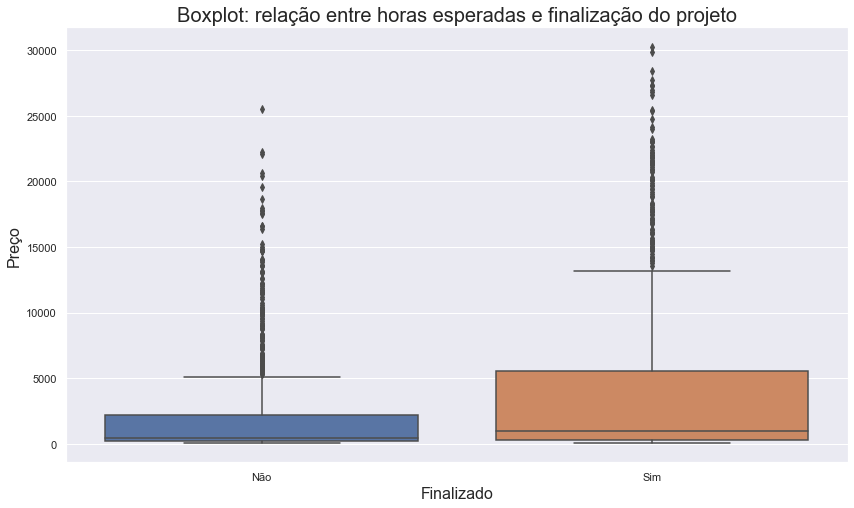

In [128]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=projects,  x='finished', y='price')

plt.title('Boxplot: relação entre horas esperadas e finalização do projeto', fontsize=20)
plt.ylabel('Preço', fontsize=16)
plt.xlabel('Finalizado', fontsize=16)
plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

O segundo boxplot mostra que há uma dependência entre a finalização do projeto com o valor do mesmo.

### Relação entre horas e preço

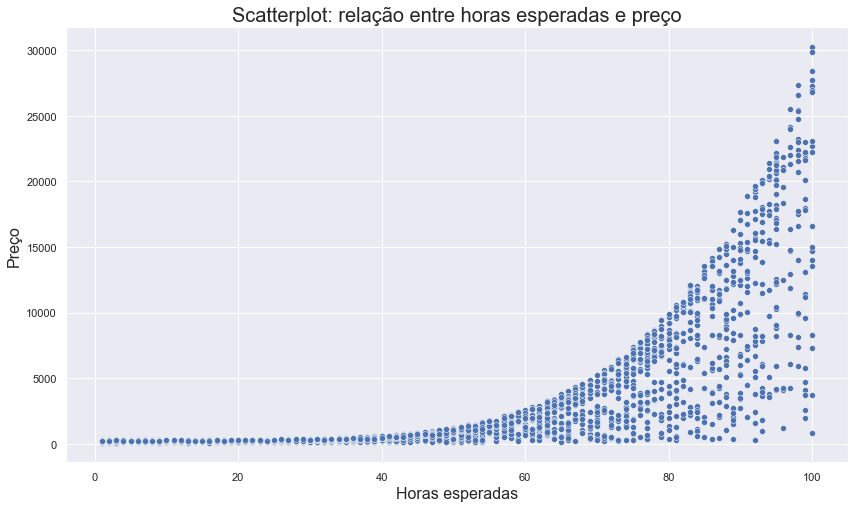

In [129]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=projects, x='expected_hours', y='price')

plt.title('Scatterplot: relação entre horas esperadas e preço', fontsize=20)
plt.ylabel('Preço', fontsize=16)
plt.xlabel('Horas esperadas', fontsize=16)

plt.show()

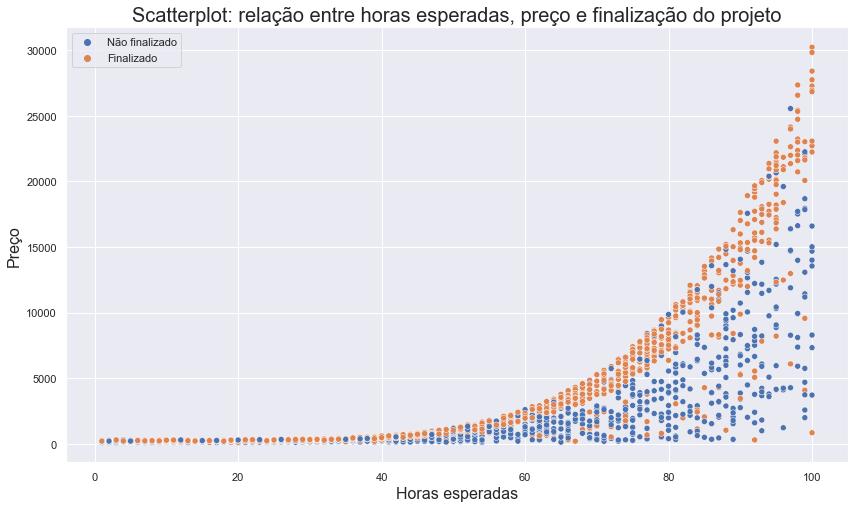

In [130]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=projects, x='expected_hours', y='price',hue='finished')

plt.title('Scatterplot: relação entre horas esperadas, preço e finalização do projeto', fontsize=20)
plt.ylabel('Preço', fontsize=16)
plt.xlabel('Horas esperadas', fontsize=16)

legend = plt.legend()
legend.get_texts()[0].set_text('Não finalizado')
legend.get_texts()[1].set_text('Finalizado')

plt.show()

Pode-se deixar ainda mais visível a diferença formada pela condição de finalização do projeto.

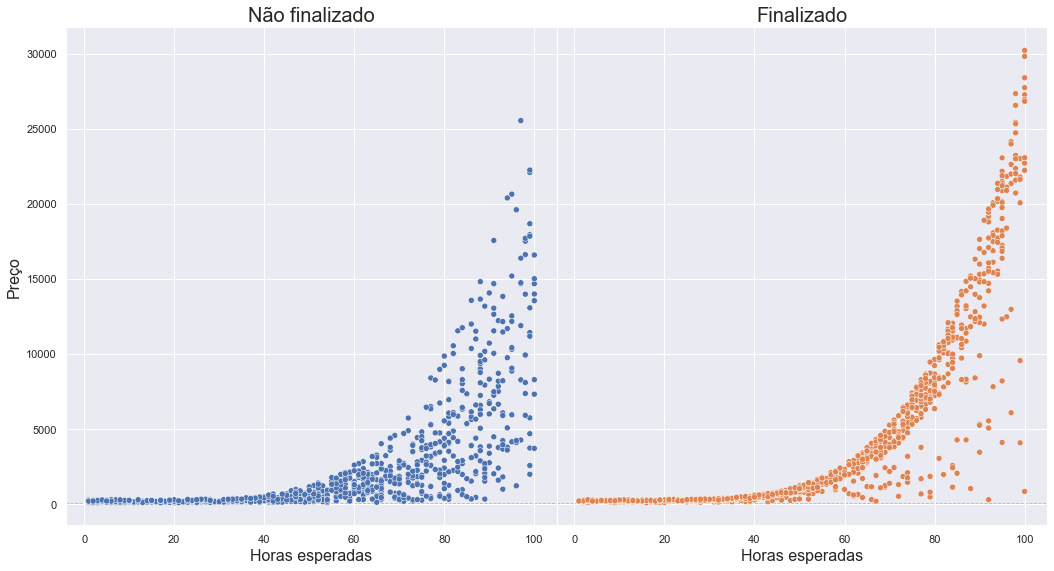

In [131]:
ax = sns.relplot(data=projects, x='expected_hours', y='price', col='finished', hue='finished')
ax.fig.set_size_inches(16, 8)

ax.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)\
  .set_axis_labels("Horas esperadas", "Preço", fontsize=16)\
  .tight_layout(w_pad=0)

ax.axes[0][0].set_title('Não finalizado', fontsize=20)
ax.axes[0][1].set_title('Finalizado', fontsize=20)

legend = ax.legend
legend.remove()

plt.show()

Com esses últimos 2 gráficos fica mais evidente a diferença referente a finalização do projeto com relação as outras variáveis.

# Separando treino e teste

In [132]:
x = projects[['expected_hours', 'price']]
y = projects['finished']

In [133]:
SEED = 73
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y)

# Criação do modelo

In [134]:
model = LinearSVC()

model.fit(train_x, train_y)

pred = model.predict(test_x)

c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [135]:
accuracy = accuracy_score(test_y, pred)

print('A acurácia do modelo foi de {:.2f}%'.format(accuracy * 100))

A acurácia do modelo foi de 47.41%


Comparando o modelo a uma baseline formada por vários 1. Logo, seria como para todo teste "chutar" que o projeto foi finalizado.

In [136]:
test_y.shape

(540,)

In [137]:
baseline = np.ones(test_y.shape[0])
accuracy = accuracy_score(test_y, baseline)

print('A acurácia do baseline foi de {:.2f}%'.format(accuracy * 100))

A acurácia do baseline foi de 52.59%


Isso mostra que o modelo escolhido não foi bom, já que só "chutar" 1 está tendo acurácia maior que a do modelo. Isso ocorre porquê o modelo utilizado é um modelo linear e a curva apresentada não apresenta uma tendência linear.

In [138]:
model = SVC(gamma='auto')

model.fit(train_x, train_y)

pred = model.predict(test_x)

In [139]:
accuracy = accuracy_score(test_y, pred)

print('A acurácia do modelo foi de {:.2f}%'.format(accuracy * 100))

A acurácia do modelo foi de 58.89%


A acurácia foi maior mas ainda é baixa. Isso porquê há uma diferença muito grande entre a escala dos eixos. Escalando novamente os dados temos:

In [140]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [141]:
model.fit(train_x, train_y)

pred = model.predict(test_x)

accuracy = accuracy_score(test_y, pred)

print('A acurácia do modelo foi de {:.2f}%'.format(accuracy * 100))

A acurácia do modelo foi de 70.00%
